# Analyze Amazon electronics dataset

In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
savepath = "dataset/precomputed/electronics"

In [2]:
all_class_colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1)]

label_to_name = {
    0:"Desktops",
    1:"Data Storage",
    2:"Laptops",
    3:"Monitors",
    4:"Computer Components",
    5:"Video Projectors",
    6:"Routers",
    7:"Tablets",
    8:"Networking Products",
    9:"Webcams"}

## Load precomputed graph and lens

In [3]:
labels = np.load(f"{savepath}/labels.npy")
with open(f"{savepath}/train_nodes.txt","r") as f:
    lines = f.readlines()
    train_nodes = [int(i.strip()) for i in lines]
with open(f"{savepath}/val_nodes.txt","r") as f:
    lines = f.readlines()
    val_nodes = [int(i.strip()) for i in lines]
with open(f"{savepath}/test_nodes.txt","r") as f:
    lines = f.readlines()
    test_nodes = [int(i.strip()) for i in lines]
ei,ej,e = [],[],[]
with open(f"{savepath}/edge_list.txt","r") as f:
    lines = f.readlines()
    num_nodes = int(lines[0].strip().split(' ')[0])
    for line in lines[1::]:
        line = line.strip().split(' ')
        ei.append(int(line[0]))
        ej.append(int(line[1]))
        e.append(int(line[2]))
G = sp.csr_matrix((e,(ei,ej)),(num_nodes,num_nodes))
preds = np.load(f"{savepath}/prediction_lens.npy")
pred_labels = np.argmax(preds,1)

## Compute Reeb graph and estimated errors

In [4]:
from GTDA.GTDA_utils import compute_reeb, NN_model
from GTDA.GTDA import GTDA

nn_model = NN_model()
nn_model.preds = preds
nn_model.labels = labels
nn_model.A = G
nn_model.train_mask = np.zeros(G.shape[0])
nn_model.train_mask[train_nodes] = 1
nn_model.val_mask = np.zeros(G.shape[0])
nn_model.val_mask[val_nodes] = 1
nn_model.test_mask = np.zeros(G.shape[0])
nn_model.test_mask[test_nodes] = 1
smallest_component = 100
overlap = (0,0.01) # only extend each bin's right boundary by 1%
labels_to_eval = list(range(preds.shape[1]))
GTDA_record = compute_reeb(GTDA,nn_model,labels_to_eval,smallest_component,overlap,extra_lens=None,
    node_size_thd=5,reeb_component_thd=5,nprocs=10,device='cuda',nsteps_mixing=20)

Preprocess lens


100%|██████████| 40/40 [00:00<00:00, 3203.78it/s]


Iteration 1
1 components to split
Grouping took 0.011058330535888672 seconds


100%|██████████| 1/1 [00:00<00:00,  4.61it/s]


Min/max largest difference: 1.0, 1.0
New components sizes:
Counter({1: 4, 2: 2, 38411: 1, 1334: 1})
Splitting took 0.2185680866241455 seconds
Iteration 2
2 components to split
Grouping took 0.01079416275024414 seconds


100%|██████████| 2/2 [00:00<00:00, 22.75it/s]


Min/max largest difference: 0.49859642189431375, 1.0
New components sizes:
Counter({1: 64, 2: 11, 3: 3, 5: 2, 31793: 1, 6615: 1, 745: 1, 487: 1, 12: 1, 4: 1, 7: 1})
Splitting took 0.09005093574523926 seconds
Iteration 3
4 components to split
Grouping took 0.011410713195800781 seconds


100%|██████████| 4/4 [00:00<00:00, 18.96it/s]


Min/max largest difference: 0.24918264879402163, 1.0
New components sizes:
Counter({1: 193, 2: 24, 3: 4, 4: 3, 29925: 1, 1868: 1, 5446: 1, 974: 1, 5: 1, 422: 1, 296: 1, 459: 1})
Splitting took 0.21251797676086426 seconds
Iteration 4
7 components to split
Grouping took 0.011873960494995117 seconds


100%|██████████| 7/7 [00:00<00:00, 33.63it/s]


Min/max largest difference: 0.1255615581345019, 0.9999983359958075
New components sizes:
Counter({1: 318, 2: 43, 3: 32, 4: 5, 5: 2, 6: 2, 29401: 1, 524: 1, 4081: 1, 1117: 1, 7: 1, 17: 1, 1701: 1, 115: 1, 8: 1, 480: 1, 356: 1, 12: 1, 13: 1, 393: 1, 358: 1, 25: 1, 218: 1, 61: 1})
Splitting took 0.2098526954650879 seconds
Iteration 5
11 components to split
Grouping took 0.012647628784179688 seconds


100%|██████████| 11/11 [00:00<00:00, 51.73it/s]


Min/max largest difference: 0.12447814853881134, 0.999998125585108
New components sizes:
Counter({1: 556, 2: 118, 3: 38, 4: 15, 5: 10, 7: 5, 8: 4, 6: 4, 10: 2, 15: 2, 28576: 1, 822: 1, 2896: 1, 19: 1, 752: 1, 9: 1, 31: 1, 1433: 1, 204: 1, 351: 1, 507: 1, 438: 1, 32: 1, 167: 1, 173: 1, 346: 1, 13: 1, 257: 1, 63: 1, 318: 1, 106: 1, 18: 1, 20: 1, 88: 1})
Splitting took 0.21441197395324707 seconds
Iteration 6
15 components to split
Grouping took 0.013135433197021484 seconds


100%|██████████| 15/15 [00:00<00:00, 70.23it/s]


Min/max largest difference: 0.06239186970824162, 0.9999962281294917
New components sizes:
Counter({1: 616, 2: 151, 3: 37, 4: 23, 5: 14, 6: 7, 9: 4, 10: 4, 7: 3, 13: 3, 12: 2, 44: 2, 26: 2, 27840: 1, 731: 1, 1838: 1, 672: 1, 1056: 1, 293: 1, 751: 1, 15: 1, 11: 1, 185: 1, 8: 1, 303: 1, 409: 1, 351: 1, 50: 1, 144: 1, 226: 1, 14: 1, 315: 1, 198: 1, 34: 1, 157: 1, 61: 1, 80: 1, 33: 1, 81: 1})
Splitting took 0.21505165100097656 seconds
Iteration 7
16 components to split
Grouping took 0.013071298599243164 seconds


100%|██████████| 16/16 [00:00<00:00, 171.03it/s]


Min/max largest difference: 0.031184514696856014, 0.9999936698094083
New components sizes:
Counter({1: 458, 2: 134, 3: 42, 4: 17, 5: 10, 9: 5, 6: 5, 8: 4, 11: 3, 60: 2, 16: 2, 23237: 1, 4565: 1, 1035: 1, 514: 1, 18: 1, 544: 1, 444: 1, 600: 1, 111: 1, 657: 1, 636: 1, 402: 1, 206: 1, 136: 1, 253: 1, 205: 1, 14: 1, 244: 1, 20: 1, 149: 1, 33: 1, 15: 1, 47: 1, 13: 1, 81: 1, 24: 1, 7: 1, 29: 1})
Splitting took 0.09517765045166016 seconds
Iteration 8
17 components to split
Grouping took 0.013079404830932617 seconds


100%|██████████| 17/17 [00:00<00:00, 81.35it/s]


Min/max largest difference: 0.015590073649436986, 0.9999268655757353
New components sizes:
Counter({1: 637, 2: 129, 3: 56, 4: 24, 5: 6, 6: 5, 7: 3, 9: 3, 8: 2, 10: 2, 23: 2, 21843: 1, 1382: 1, 13: 1, 236: 1, 15: 1, 4069: 1, 511: 1, 24: 1, 345: 1, 291: 1, 269: 1, 347: 1, 31: 1, 373: 1, 204: 1, 174: 1, 295: 1, 338: 1, 51: 1, 441: 1, 401: 1, 199: 1, 128: 1, 121: 1, 59: 1, 197: 1, 97: 1, 11: 1, 112: 1, 76: 1})
Splitting took 0.21041321754455566 seconds
Iteration 9
21 components to split
Grouping took 0.01420903205871582 seconds


100%|██████████| 21/21 [00:00<00:00, 247.09it/s]


Min/max largest difference: 0.007785204482647856, 0.9998075465483802
New components sizes:
Counter({1: 767, 2: 130, 3: 50, 4: 25, 6: 12, 5: 6, 7: 6, 8: 4, 10: 4, 9: 3, 12: 2, 196: 2, 13: 2, 20: 2, 17: 2, 11: 2, 17307: 1, 4449: 1, 3211: 1, 665: 1, 964: 1, 360: 1, 275: 1, 420: 1, 45: 1, 46: 1, 195: 1, 178: 1, 15: 1, 145: 1, 163: 1, 33: 1, 197: 1, 200: 1, 239: 1, 92: 1, 50: 1, 19: 1, 39: 1, 179: 1, 146: 1, 140: 1, 25: 1, 104: 1, 59: 1, 16: 1, 122: 1, 116: 1, 14: 1, 61: 1})
Splitting took 0.08663034439086914 seconds
Iteration 10
23 components to split
Grouping took 0.014446020126342773 seconds


100%|██████████| 23/23 [00:00<00:00, 112.41it/s]


Min/max largest difference: 0.0038911195104958107, 0.9864411195993944
New components sizes:
Counter({1: 855, 2: 139, 3: 52, 4: 26, 5: 20, 6: 11, 9: 5, 10: 3, 8: 2, 7: 2, 172: 2, 13: 2, 17: 2, 15: 2, 15451: 1, 1203: 1, 3899: 1, 510: 1, 1191: 1, 1870: 1, 352: 1, 12: 1, 425: 1, 14: 1, 624: 1, 19: 1, 339: 1, 30: 1, 348: 1, 268: 1, 32: 1, 129: 1, 158: 1, 164: 1, 147: 1, 16: 1, 118: 1, 114: 1, 11: 1, 52: 1, 38: 1, 145: 1, 85: 1, 18: 1, 63: 1, 20: 1, 96: 1, 82: 1, 103: 1})
Splitting took 0.20635485649108887 seconds
Iteration 11
22 components to split
Grouping took 0.013682842254638672 seconds


100%|██████████| 22/22 [00:00<00:00, 283.72it/s]


Min/max largest difference: 0.0019513678547954383, 0.5041823181090032
New components sizes:
Counter({1: 1094, 2: 199, 3: 72, 4: 24, 5: 16, 7: 11, 6: 9, 8: 6, 12: 5, 9: 4, 10: 3, 21: 2, 22: 2, 240: 2, 13479: 1, 1404: 1, 2613: 1, 1128: 1, 17: 1, 1062: 1, 639: 1, 98: 1, 1066: 1, 60: 1, 989: 1, 537: 1, 162: 1, 61: 1, 14: 1, 139: 1, 38: 1, 280: 1, 11: 1, 334: 1, 226: 1, 76: 1, 100: 1, 94: 1, 34: 1, 48: 1, 37: 1, 125: 1, 105: 1, 119: 1, 77: 1, 15: 1, 63: 1})
Splitting took 0.07928633689880371 seconds
Iteration 12
19 components to split
Grouping took 0.012340545654296875 seconds


100%|██████████| 19/19 [00:00<00:00, 279.38it/s]


Min/max largest difference: 0.003917522232018911, 0.5032643637951743
New components sizes:
Counter({1: 982, 2: 224, 3: 76, 4: 26, 5: 19, 6: 13, 7: 7, 9: 5, 11: 3, 8: 3, 15: 2, 22: 2, 10652: 1, 2319: 1, 1279: 1, 1232: 1, 233: 1, 1029: 1, 914: 1, 55: 1, 10: 1, 104: 1, 828: 1, 784: 1, 14: 1, 74: 1, 18: 1, 952: 1, 457: 1, 80: 1, 430: 1, 36: 1, 200: 1, 17: 1, 93: 1, 21: 1, 37: 1, 19: 1, 114: 1, 239: 1, 149: 1, 30: 1, 78: 1, 13: 1, 73: 1, 20: 1, 123: 1, 33: 1, 26: 1, 35: 1})
Splitting took 0.06970381736755371 seconds
Iteration 13
18 components to split
Grouping took 0.011792659759521484 seconds


100%|██████████| 18/18 [00:00<00:00, 94.71it/s]


Min/max largest difference: 0.0022721567027758818, 0.503121389308848
New components sizes:
Counter({1: 786, 2: 167, 3: 64, 4: 26, 5: 20, 6: 10, 8: 8, 12: 3, 11: 2, 13: 2, 16: 2, 10: 2, 9: 2, 14: 2, 6723: 1, 3485: 1, 1974: 1, 157: 1, 1090: 1, 112: 1, 891: 1, 50: 1, 78: 1, 74: 1, 7: 1, 569: 1, 261: 1, 828: 1, 20: 1, 892: 1, 578: 1, 70: 1, 83: 1, 766: 1, 338: 1, 15: 1, 426: 1, 180: 1, 121: 1, 42: 1, 183: 1, 93: 1, 77: 1, 33: 1, 58: 1, 40: 1})
Splitting took 0.19152212142944336 seconds
Iteration 14
18 components to split
Grouping took 0.01180720329284668 seconds


100%|██████████| 18/18 [00:00<00:00, 329.99it/s]


Min/max largest difference: 0.017810853441465175, 0.5028206302100129
New components sizes:
Counter({1: 782, 2: 160, 3: 52, 4: 22, 7: 12, 5: 11, 6: 8, 8: 4, 10: 2, 3130: 1, 3296: 1, 3255: 1, 127: 1, 1455: 1, 230: 1, 183: 1, 9: 1, 774: 1, 891: 1, 647: 1, 25: 1, 109: 1, 822: 1, 660: 1, 23: 1, 543: 1, 24: 1, 556: 1, 303: 1, 34: 1, 221: 1, 14: 1, 148: 1, 43: 1, 165: 1, 76: 1, 62: 1, 56: 1, 58: 1, 46: 1, 41: 1, 37: 1})
Splitting took 0.055945396423339844 seconds
Iteration 15
19 components to split
Grouping took 0.011126041412353516 seconds


100%|██████████| 19/19 [00:00<00:00, 372.58it/s]


Min/max largest difference: 0.015457458636099153, 0.4981526675360105
New components sizes:
Counter({1: 915, 2: 195, 3: 75, 4: 36, 6: 12, 5: 12, 10: 6, 7: 4, 13: 3, 8: 3, 9: 3, 92: 2, 24: 2, 12: 2, 2289: 1, 654: 1, 2308: 1, 402: 1, 3046: 1, 34: 1, 1437: 1, 663: 1, 101: 1, 104: 1, 456: 1, 773: 1, 655: 1, 476: 1, 66: 1, 510: 1, 438: 1, 47: 1, 261: 1, 11: 1, 14: 1, 173: 1, 19: 1, 21: 1, 18: 1, 23: 1, 100: 1, 40: 1, 51: 1, 41: 1, 78: 1, 22: 1, 15: 1})
Splitting took 0.05273103713989258 seconds
Iteration 16
17 components to split
Grouping took 0.010186910629272461 seconds


100%|██████████| 17/17 [00:00<00:00, 392.26it/s]


Min/max largest difference: 0.01540086042685651, 0.49480881035019236
New components sizes:
Counter({1: 844, 2: 163, 3: 63, 4: 28, 5: 12, 6: 8, 9: 5, 7: 4, 15: 3, 8: 3, 423: 2, 20: 2, 18: 2, 44: 1, 255: 1, 2189: 1, 10: 1, 16: 1, 2291: 1, 1600: 1, 509: 1, 1424: 1, 733: 1, 148: 1, 636: 1, 487: 1, 26: 1, 12: 1, 32: 1, 22: 1, 321: 1, 441: 1, 136: 1, 180: 1, 61: 1, 249: 1, 35: 1, 125: 1, 23: 1, 13: 1, 17: 1, 14: 1, 94: 1, 38: 1})
Splitting took 0.04502987861633301 seconds
Iteration 17
18 components to split
Grouping took 0.009186506271362305 seconds


100%|██████████| 18/18 [00:00<00:00, 431.07it/s]


Min/max largest difference: 0.010277409298278962, 0.48758338475645174
New components sizes:
Counter({1: 1042, 2: 216, 3: 69, 4: 32, 5: 17, 6: 10, 7: 6, 9: 5, 10: 3, 198: 2, 17: 2, 8: 2, 2271: 1, 1458: 1, 21: 1, 217: 1, 1544: 1, 18: 1, 908: 1, 724: 1, 20: 1, 27: 1, 320: 1, 347: 1, 77: 1, 310: 1, 108: 1, 237: 1, 26: 1, 183: 1, 170: 1, 161: 1, 24: 1, 123: 1, 28: 1, 13: 1, 40: 1, 54: 1, 176: 1, 144: 1, 120: 1, 12: 1, 122: 1, 106: 1})
Splitting took 0.043549299240112305 seconds
Iteration 18
22 components to split
Grouping took 0.009167909622192383 seconds


100%|██████████| 22/22 [00:00<00:00, 556.11it/s]


Min/max largest difference: 0.006579975941051308, 0.46566266791141236
New components sizes:
Counter({1: 921, 2: 193, 3: 66, 4: 43, 5: 20, 6: 10, 8: 7, 7: 3, 10: 2, 16: 2, 36: 2, 1285: 1, 354: 1, 316: 1, 1071: 1, 1358: 1, 30: 1, 66: 1, 795: 1, 211: 1, 362: 1, 306: 1, 50: 1, 28: 1, 21: 1, 13: 1, 259: 1, 12: 1, 162: 1, 35: 1, 11: 1, 155: 1, 55: 1, 105: 1, 62: 1, 19: 1, 108: 1, 32: 1, 158: 1, 146: 1, 18: 1, 88: 1, 127: 1, 60: 1, 48: 1, 34: 1, 117: 1, 15: 1, 27: 1, 26: 1})
Splitting took 0.041257619857788086 seconds
Iteration 19
18 components to split
Grouping took 0.007166147232055664 seconds


100%|██████████| 18/18 [00:00<00:00, 613.72it/s]


Min/max largest difference: 0.005075878475243192, 0.24103300227287455
New components sizes:
Counter({1: 475, 2: 90, 3: 25, 4: 15, 5: 8, 6: 6, 7: 4, 14: 3, 8: 2, 81: 2, 198: 1, 957: 1, 1154: 1, 10: 1, 931: 1, 96: 1, 148: 1, 468: 1, 49: 1, 219: 1, 338: 1, 271: 1, 40: 1, 284: 1, 204: 1, 32: 1, 80: 1, 161: 1, 151: 1, 139: 1, 107: 1, 22: 1, 18: 1, 82: 1, 60: 1, 11: 1, 79: 1, 9: 1})
Splitting took 0.030617475509643555 seconds
Iteration 20
15 components to split
Grouping took 0.006289243698120117 seconds


100%|██████████| 15/15 [00:00<00:00, 659.56it/s]


Min/max largest difference: 0.004740638330771498, 0.11827103919940063
New components sizes:
Counter({1: 244, 2: 47, 3: 16, 5: 4, 4: 3, 7: 3, 46: 2, 21: 2, 173: 2, 1137: 1, 927: 1, 844: 1, 464: 1, 24: 1, 254: 1, 249: 1, 62: 1, 218: 1, 22: 1, 156: 1, 27: 1, 49: 1, 44: 1, 55: 1, 8: 1, 13: 1, 143: 1, 96: 1, 28: 1})
Splitting took 0.024306297302246094 seconds
Iteration 21
11 components to split
Grouping took 0.004454374313354492 seconds


100%|██████████| 11/11 [00:00<00:00, 563.11it/s]


Min/max largest difference: 0.0040995937692704515, 0.10215882214380498
New components sizes:
Counter({1: 515, 2: 105, 3: 43, 4: 11, 5: 4, 6: 2, 10: 2, 13: 2, 264: 1, 556: 1, 9: 1, 378: 1, 330: 1, 391: 1, 381: 1, 232: 1, 25: 1, 17: 1, 8: 1, 51: 1, 180: 1, 227: 1, 117: 1, 37: 1, 164: 1, 167: 1, 72: 1, 7: 1, 46: 1, 129: 1})
Splitting took 0.02084493637084961 seconds
Iteration 22
13 components to split
Grouping took 0.005109071731567383 seconds


100%|██████████| 13/13 [00:00<00:00, 732.73it/s]


Min/max largest difference: 0.003282047374505437, 0.07158513383593804
New components sizes:
Counter({1: 393, 2: 81, 3: 24, 5: 6, 4: 5, 7: 3, 9: 2, 143: 1, 178: 1, 351: 1, 34: 1, 294: 1, 6: 1, 46: 1, 183: 1, 55: 1, 278: 1, 22: 1, 153: 1, 31: 1, 215: 1, 223: 1, 134: 1, 60: 1, 92: 1, 15: 1, 140: 1, 116: 1, 11: 1, 27: 1})
Splitting took 0.019211292266845703 seconds
Iteration 23
12 components to split
Grouping took 0.0037050247192382812 seconds


100%|██████████| 12/12 [00:00<00:00, 831.06it/s]


Min/max largest difference: 0.005194353261371689, 0.05679450701426847
New components sizes:
Counter({1: 310, 2: 47, 3: 13, 4: 4, 12: 3, 5: 3, 345: 1, 277: 1, 13: 1, 165: 1, 11: 1, 6: 1, 121: 1, 52: 1, 20: 1, 16: 1, 94: 1, 7: 1, 42: 1, 8: 1, 34: 1, 109: 1, 9: 1, 97: 1, 17: 1, 138: 1, 126: 1, 116: 1, 84: 1})
Splitting took 0.015901803970336914 seconds
Iteration 24
8 components to split
Grouping took 0.002436399459838867 seconds


100%|██████████| 8/8 [00:00<00:00, 849.69it/s]


Min/max largest difference: 0.0038203790379366387, 0.024237919800406845
New components sizes:
Counter({1: 166, 2: 24, 3: 8, 4: 3, 219: 1, 107: 1, 130: 1, 121: 1, 146: 1, 8: 1, 55: 1, 38: 1, 46: 1, 65: 1, 57: 1, 29: 1, 18: 1, 12: 1, 104: 1})
Splitting took 0.010854482650756836 seconds
Iteration 25
6 components to split
Grouping took 0.0016667842864990234 seconds


100%|██████████| 6/6 [00:00<00:00, 926.03it/s]


Min/max largest difference: 0.0031149241119586358, 0.01685555499720505
New components sizes:
Counter({1: 80, 2: 8, 3: 5, 5: 2, 81: 1, 107: 1, 4: 1, 84: 1, 26: 1, 113: 1, 38: 1, 70: 1, 103: 1, 85: 1})
Splitting took 0.007941722869873047 seconds
Iteration 26
3 components to split
Grouping took 0.0008528232574462891 seconds


100%|██████████| 3/3 [00:00<00:00, 927.46it/s]


Min/max largest difference: 0.002696895353088027, 0.0032613257855237054
New components sizes:
Counter({1: 43, 2: 6, 3: 2, 76: 1, 8: 1, 5: 1, 79: 1, 9: 1, 64: 1, 22: 1})
Splitting took 0.0047054290771484375 seconds
Number of samples included before filtering: 39747
Number of samples included after filtering: 15229
Merge reeb nodes...


100%|██████████| 18335/18335 [00:03<00:00, 4681.99it/s]


Number of samples included after merging: 35369
Merge reeb nodes...


100%|██████████| 1419/1419 [00:00<00:00, 4932.13it/s]


Number of samples included after merging: 39734
Merge reeb nodes...


100%|██████████| 3/3 [00:00<00:00, 2171.71it/s]


Number of samples included after merging: 39747
Merge reeb nodes...


0it [00:00, ?it/s]


Number of samples included after merging: 39747
Build reeb graph...


100%|██████████| 47/47 [00:00<00:00, 3370.53it/s]


Number of samples included after merging reeb components: 39747
Total time for building reeb graph is 11.720962285995483 seconds
Compute mixing rate for each sample


## Visualize a component of GTDA results

100%|██████████| 19/19 [00:00<00:00, 154.67it/s]


Text(0.5, 1.0, 'estimated errors')

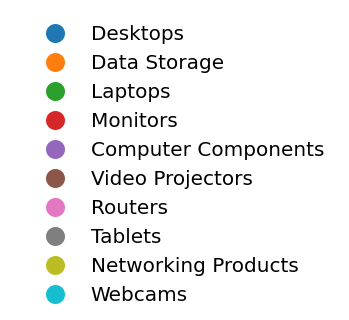

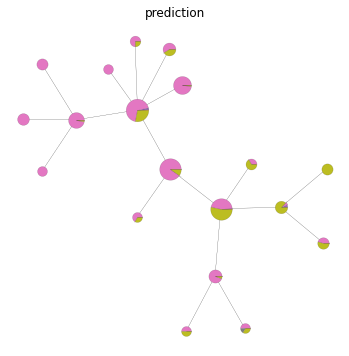

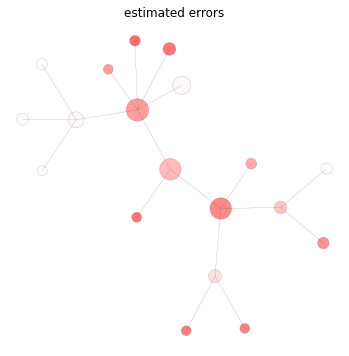

In [9]:
import networkx as nx
from GTDA.GTDA_utils import find_components, plot_reeb_component
import pandas as pd
from matplotlib.lines import Line2D

gtda = GTDA_record['gtda']
g_reeb = GTDA_record['g_reeb']
reeb_components = find_components(g_reeb,size_thd=0)[1]
component = reeb_components[17]
g_sub = g_reeb[component,:][:,component]
xcoords = np.zeros(len(component))
ycoords = np.zeros(len(component))
pos_tmp = nx.kamada_kawai_layout(nx.from_scipy_sparse_matrix(g_sub))
for i in range(len(component)):
    xcoords[i] = pos_tmp[i][0]
    ycoords[i] = pos_tmp[i][1]
df = pd.DataFrame({'x':xcoords,'y':ycoords,'sizes':40*gtda.node_sizes[gtda.filtered_nodes[component]]**0.5})

patches = []
for label_to_eval in labels_to_eval:
    patches.append(
        Line2D(
            [0],[0],marker='o',markerfacecolor=all_class_colors[label_to_eval],
            label=f"{label_to_name[label_to_eval]}",color='w',markersize=20))
fig_legend,ax_legend = plt.subplots(figsize=(6, 1))
ax_legend.legend(handles=patches,fontsize=20,framealpha=0,ncol=1)
ax_legend.axis('off')

fig,ax = plt.subplots(figsize=(6,6))
fig,ax = plot_reeb_component(g_sub,df,gtda.node_colors_class[gtda.filtered_nodes[component]],
    labels_to_eval=labels_to_eval,all_class_colors=all_class_colors,fig=fig,ax=ax)
ax.set_title('prediction')

fig,ax = plt.subplots(figsize=(6,6))
node_colors = [(1,0,0,i) for i in gtda.node_colors_mixing[gtda.filtered_nodes[component]]]
fig,ax = plot_reeb_component(g_sub,df,node_colors,
    labels_to_eval=labels_to_eval,all_class_colors=all_class_colors,fig=fig,ax=ax,is_plotting_error=True)
ax.set_title('estimated errors')

In [18]:
import gzip
from collections import Counter

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
      yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

meta_df = getDF(f'dataset/meta_Electronics_2014.json.gz')
meta_categories = {}
all_asin = meta_df['asin'].values
raw_categories = meta_df['categories'].values
for i in range(len(all_asin)):
    meta_categories[all_asin[i]] = raw_categories[i][0]

with open(f"{savepath}/product_asin.txt","r") as f:
    lines = f.readlines()
    selected_asin = [i.strip() for i in lines]

nodes = []
for reeb_node in component:
    nodes += gtda.final_components_filtered[gtda.filtered_nodes[reeb_node]]
selected_cats = []
for node in nodes:
    if labels[node] == 8:
        selected_cats += meta_categories[selected_asin[node]][3::]
print("Top 3 most common subcategories of Networking Products in this component are:")
print(Counter(selected_cats).most_common(3))

Top 3 most common subcategories of Networking Products in this component are:
[('Modems', 118), ('Wireless Access Points', 84), ('Switches', 17)]
